# Exploratory Data Analysis - Forbes Richest Athletes data (1990-2020)

## Title - Forbes Richest Athlete
> The data has been extracted from topendsports.com website

## Content 
> The data available from 1990 to 2020 but 2001 was not recorded.

In [7]:
from IPython import display

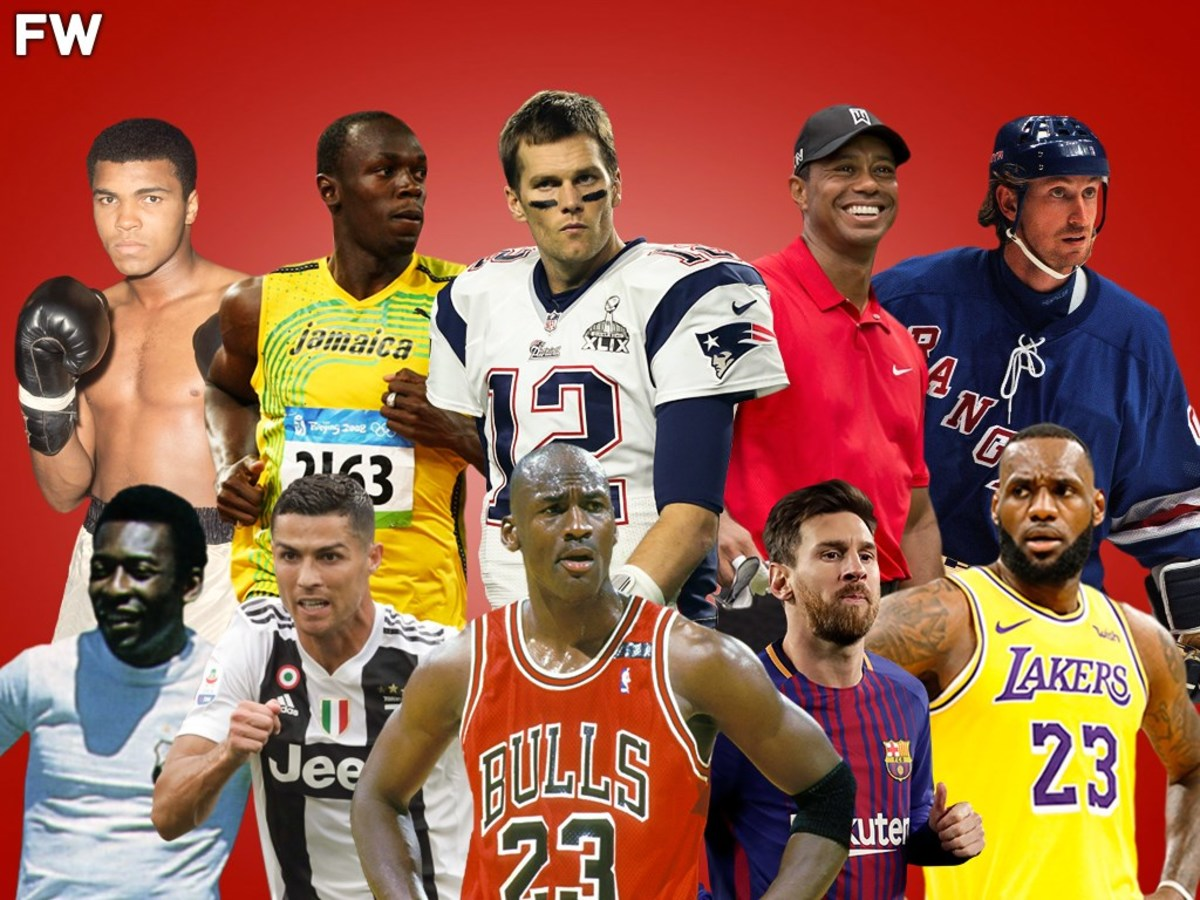

In [21]:
display.Image('athletes.jpg',width=600,height=700)

In [212]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

%matplotlib inline

In [256]:
atheletes_pd = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

In [203]:
atheletes_pd.sample(4)

S.NO               Name Nationality  Current Rank Previous Year Rank  \
187   188     Phil Mickelson         USA             6                  3   
86     87   Oscar De La Hoya         USA             7                NaN   
232   233  Cristiano Ronaldo    Portugal             2                  9   
134   135     Michael Jordan         USA             4                  3   

          Sport  Year  earnings ($ million)  
187        golf  2009                  40.0  
86       Boxing  1998                  18.5  
232      Soccer  2014                  80.0  
134  basketball  2004                  35.0

In [24]:
atheletes_pd.shape

(301, 8)

#### Observation 
> The data contans 301 rows and 8 columns

In [27]:
atheletes_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


#### Observation:
> From the above, there are some missing values in the Previous Year Rank

In [257]:
atheletes_pd.dropna(subset=['Previous Year Rank'],inplace=True)

In [206]:
atheletes_pd.describe()

S.NO  Current Rank         Year  earnings ($ million)
count  277.000000    277.000000   277.000000            277.000000
mean   156.909747      5.415162  2005.754513             47.296390
std     84.101490      2.857267     8.759117             34.038016
min     11.000000      1.000000  1991.000000              8.500000
25%     80.000000      3.000000  1997.000000             26.000000
50%    159.000000      5.000000  2006.000000             40.000000
75%    228.000000      8.000000  2013.000000             60.500000
max    301.000000     10.000000  2020.000000            300.000000

#### Observations
> Average athlete can earn up to 45 million/year

In [173]:
atheletes_pd[atheletes_pd['Nationality']=='USA']

S.NO               Name Nationality  Current Rank Previous Year Rank  \
10     11  Evander Holyfield         USA             1                  8   
11     12         Mike Tyson         USA             2                  1   
12     13     Michael Jordan         USA             3                  8   
13     14     George Foreman         USA             4                >30   
17     18      Arnold Palmer         USA             8                  8   
..    ...                ...         ...           ...                ...   
296   297      Stephen Curry         USA             6                  9   
297   298       Kevin Durant         USA             7                 10   
298   299        Tiger Woods         USA             8                 11   
299   300       Kirk Cousins         USA             9               >100   
300   301       Carson Wentz         USA            10               >100   

                 Sport  Year  earnings ($ million)  
10              boxing  1991                  60.5  
11              boxing  1991                  31.5  
12          basketball  1991                  16.0  
13              boxing  1991                  14.5  
17                golf  1991                   9.3  
..                 ...   ...                   ...  
296         Basketball  2020                  74.4  
297         Basketball  2020                  63.9  
298               Golf  2020                  62.3  
299  American Football  2020                  60.5  
300  American Football  2020                  59.1  

[188 rows x 8 columns]

## Country 

In [224]:
atheletes_pd['Nationality'].unique()

array(['USA', 'Brazil', 'France', 'Australia', 'Canada', 'UK', 'Austria',
       'Germany', 'Russia', 'Italy', 'Finland', 'Switzerland',
       'Philippines', 'Portugal', 'Dominican', 'Argentina', 'Filipino',
       'Spain', 'Serbia', 'Northern Ireland', 'Ireland', 'Mexico'],
      dtype=object)

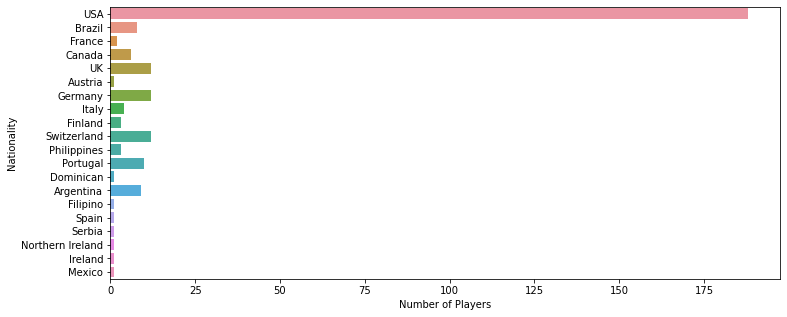

In [175]:
fig ,ax=plt.subplots(figsize=(12,5))
sns.countplot(y=atheletes_pd['Nationality'],orient='v',ax=ax)
ax.set_xlabel('Number of Players');


#### Obeservations:
> Most atheletes in the data set  are from the USA.

 #### `Total Earnings of atheletes from each country`

In [176]:
tot_earn_countries=tot_earn_ctry.groupby('Nationality').sum().sort_values(by='earnings ($ million)',ascending=False).reset_index()

In [177]:
tot_earn_countries

Nationality   S.NO  Current Rank    Year  earnings ($ million)
0                USA  28738          1145  412806                8786.3
1           Portugal   2499            39   20155                 787.1
2        Switzerland   2882            59   24173                 781.1
3          Argentina   2288            39   18143                 715.5
4            Germany   1510            44   26023                 639.0
5                 UK   2028            88   26073                 443.2
6             Brazil   1279            44   18038                 422.0
7        Philippines    631            16    6034                 242.0
8            Finland    526            11    6024                 129.0
9              Italy    680            35    8028                 128.0
10            Canada    453            51   11982                  99.1
11           Ireland    275             4    2018                  99.0
12            Mexico    285             4    2019                  94.0
13          Filipino    213             2    2012                  62.0
14            Serbia    257             6    2016                  55.8
15  Northern Ireland    268             6    2017                  50.0
16             Spain    240             9    2014                  44.5
17            France     55            15    5974                  36.0
18         Dominican    209             8    2011                  35.0
19            Russia     83             3    1998                  29.8
20           Austria     45             5    1994                  13.5
21         Australia      7             7    1990                   8.5

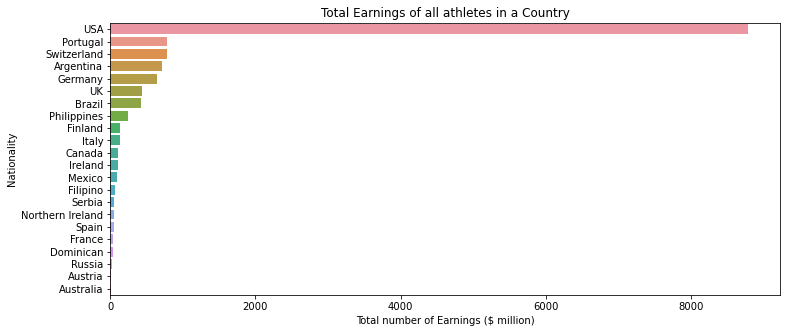

In [178]:
fig ,ax=plt.subplots(figsize=(12,5))
sns.barplot(data=top_10_countries,y='Nationality',x='earnings ($ million)',ax=ax)
ax.set_xlabel('Total number of Earnings ($ million)')
ax.set_title('Total Earnings of all athletes in a Country');

#### Observations
> Total earnings of Atheletes from USA 1990 - 2020 is over $8 Billion 

## Year

### ` How much did the highest paid athlete earn each year?`

In [179]:
highest_paid_yearly = atheletes_pd[atheletes_pd['Current Rank']==1].sort_values('Year')

In [180]:
highest_paid_yearly

S.NO                Name  Nationality  Current Rank Previous Year Rank  \
10     11   Evander Holyfield          USA             1                  8   
20     21      Michael Jordan          USA             1                  3   
30     31      Michael Jordan          USA             1                  1   
40     41      Michael Jordan          USA             1                  1   
50     51      Michael Jordan          USA             1                  1   
60     61          Mike Tyson          USA             1                  2   
70     71      Michael Jordan          USA             1                  2   
90     91  Michael Schumacher      Germany             1                  2   
100   101  Michael Schumacher      Germany             1                  1   
110   111         Tiger Woods          USA             1                  2   
121   122         Tiger Woods          USA             1                  1   
131   132         Tiger Woods          USA             1                  1   
141   142         Tiger Woods          USA             1                  1   
151   152         Tiger Woods          USA             1                  1   
161   162         Tiger Woods          USA             1                  1   
171   172         Tiger Woods          USA             1                  1   
181   182         Tiger Woods          USA             1                  1   
191   192         Tiger Woods          USA             1                  1   
201   202         Tiger Woods          USA             1                  1   
211   212    Floyd Mayweather          USA             1                  ?   
221   222         Tiger Woods          USA             1                  3   
231   232    Floyd Mayweather          USA             1                 14   
241   242    Floyd Mayweather          USA             1                  1   
251   252   Cristiano Ronaldo     Portugal             1                  3   
261   262   Cristiano Ronaldo     Portugal             1                  1   
271   272    Floyd Mayweather          USA             1               >100   
281   282        Lionel Messi    Argentina             1                  2   
291   292       Roger Federer  Switzerland             1                  5   

           Sport  Year  earnings ($ million)  
10        boxing  1991                  60.5  
20    Basketball  1992                  35.9  
30    Basketball  1993                  36.0  
40    Basketball  1994                  30.0  
50    basketball  1995                  43.9  
60        Boxing  1996                  75.0  
70    Basketball  1997                  78.3  
90   Auto Racing  1999                  49.0  
100  Auto Racing  2000                  59.0  
110         Golf  2002                  69.0  
121         Golf  2003                  78.0  
131         golf  2004                  80.3  
141         golf  2005                  87.0  
151         golf  2006                  90.0  
161         golf  2007                 100.0  
171         golf  2008                 115.0  
181         golf  2009                 110.0  
191         golf  2010                 105.0  
201         golf  2011                  75.0  
211       Boxing  2012                  85.0  
221         Golf  2013                  78.1  
231       Boxing  2014                 105.0  
241       Boxing  2015                 300.0  
251       Soccer  2016                  88.0  
261       Soccer  2017                  93.0  
271       Boxing  2018                 285.0  
281       Soccer  2019                 127.0  
291       Tennis  2020                 106.3

In [183]:
fig ,ax=plt.subplots(figsize=(12,5))
ax.set_title('Earnings of highest paid Athlete each year');
sns.lineplot(data=highest_paid_yearly,x='Year',y='earnings ($ million)',ax=ax);

#### Observations:
* We can see that the earnings of the highest paid athlete increases over time.
* The highest paid athlete ever in a year was $300 million in 2015

## Sports 

#### `Top 5 highest earning in each Sport`

In [258]:
atheletes_pd['Sport'].unique()

array(['boxing', 'basketball', 'auto racing', 'golf', 'Basketball',
       'Boxing', 'Auto Racing', 'Golf', 'Tennis', 'NFL', 'Auto racing',
       'NBA', 'Baseball', 'Ice Hockey', 'American Football / Baseball',
       'tennis', 'ice hockey', 'F1 Motorsports', 'NASCAR', 'Hockey',
       'Auto Racing (Nascar)', 'F1 racing', 'American Football', 'soccer',
       'baseball', 'cycling', 'motorcycle gp', 'Soccer', 'MMA'],
      dtype=object)

#### Observations
> We can see that there duplicate entries in the Sports column, so we fix that.

In [259]:
atheletes_pd.loc[atheletes_pd['Sport']=='American Football / Baseball',['Sport']] = 'American Football'

In [260]:
atheletes_pd['Sport'] = atheletes_pd['Sport'].str.lower()

In [261]:
atheletes_pd['Sport'].unique()

array(['boxing', 'basketball', 'auto racing', 'golf', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'soccer', 'cycling', 'motorcycle gp', 'mma'],
      dtype=object)

In [252]:
atheletes_pd.loc[atheletes_pd['Sport']=='basketball',['Sport']] = 'nba'

In [263]:
atheletes_pd.loc[atheletes_pd['Sport'].isin(['auto racing (nascar)','f1 racing','f1 motorsports','nascar','motocycle gp','auto racing']),['Sport']]='Racing'

In [264]:
atheletes_pd['Sport'].unique()

array(['boxing', 'basketball', 'Racing', 'golf', 'tennis', 'nfl', 'nba',
       'baseball', 'ice hockey', 'american football', 'hockey', 'soccer',
       'cycling', 'motorcycle gp', 'mma'], dtype=object)

#### Observation
> Sports column looks clean